In [1]:
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection
from sklearn.manifold import Isomap
from functions import preprocess_titanic, preprocess_iris
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
SEED=42

In [3]:
def dm_pca(x, n_components):
    pca = PCA(n_components=n_components, random_state=SEED)
    res = pca.fit_transform(x)
    return res

def dm_ica(x, n_components):
    ica = FastICA(n_components=n_components, random_state=SEED)
    res = ica.fit_transform(x)
    return res

def dm_rp(x, n_components):
    rp = random_projection.GaussianRandomProjection(n_components=n_components, random_state=SEED)
    res = rp.fit_transform(x)
    return res

def dm_isomap(x, n_components, n_neighbors):
    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    res = isomap.fit_transform(x)
    return res

In [4]:
def scale_data(x):
    scaler = MinMaxScaler()
    data = np.array(x).reshape(-1,1)
    scaler.fit(data)
    return scaler.fit_transform(data).reshape(-1).tolist()

In [5]:
n_cluster = [ x for x in range(2,21) ]

In [6]:
dm_algorithms = ["PCA", "ICA", "RP", "Isomap"]

# Iris

In [7]:
X_train, X_test, y_train, y_test, supervised_labels = preprocess_iris(normalized=True)

# GMM

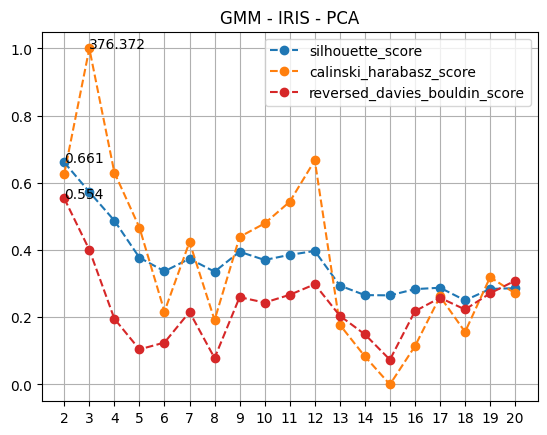

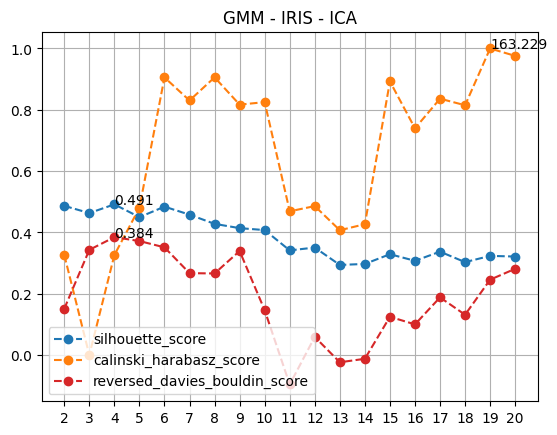

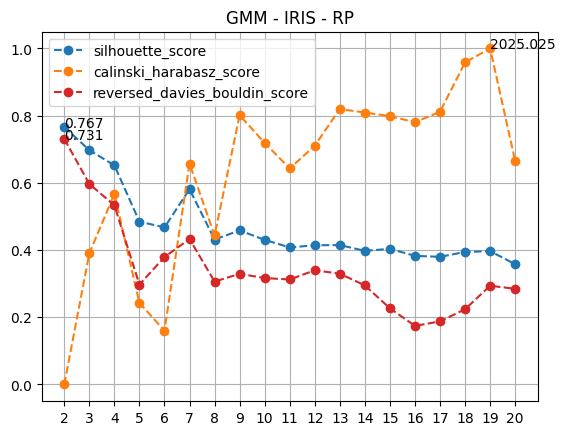

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


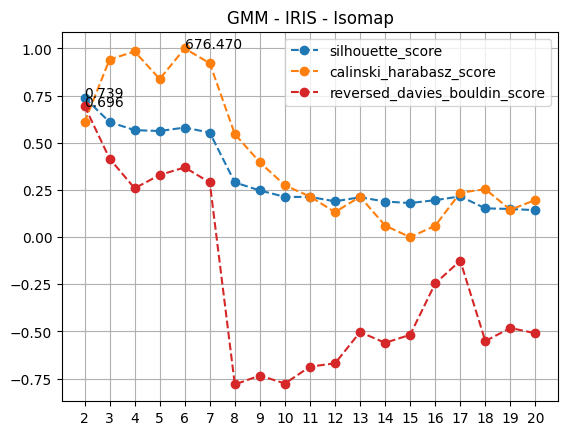

In [8]:
for z in dm_algorithms:
    sil_score = []
    chs_score = []
    dbs_score = []
    if z == "PCA":
        train_data = dm_pca(X_train, 2)
    elif z == "ICA":
        train_data = dm_ica(X_train, 2)
    elif z == "RP":
        train_data = dm_rp(X_train, 2)
    elif z == "Isomap":
        train_data = dm_isomap(X_train, 2, 8)
    else:
        raise ValueError("Not Implemented")
    for c in n_cluster:
        transformer = GaussianMixture(n_components=c, random_state=SEED).fit(train_data)
        y_pred = transformer.predict(train_data)
        sil_score.append(silhouette_score(train_data, y_pred))
        chs_score.append(calinski_harabasz_score(train_data, y_pred))
        dbs_score.append(davies_bouldin_score(train_data, y_pred))

    sil_score = sil_score
    chs_score_scaled = scale_data(chs_score)
    dbs_score = dbs_score
    reverse_dbs = [1-x for x in dbs_score]

    colors = mcolors.TABLEAU_COLORS
    plt.plot(n_cluster,sil_score,linestyle='--', marker='o', color=colors["tab:blue"], label="silhouette_score")
    highest = max(sil_score)
    index = sil_score.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))

    plt.plot(n_cluster,chs_score_scaled,linestyle='--', marker='o', color=colors["tab:orange"], label="calinski_harabasz_score")
    highest = max(chs_score_scaled)
    index = chs_score_scaled.index(highest)
    plt.annotate("%.3f" % chs_score[index],(index+2,highest))

    plt.plot(n_cluster,reverse_dbs,linestyle='--', marker='o', color=colors["tab:red"], label="reversed_davies_bouldin_score")
    highest = max(reverse_dbs)
    index = reverse_dbs.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))
    plt.xticks(n_cluster)
    plt.legend()
    plt.grid()
    plt.title("GMM - IRIS - %s" % z)
    plt.show()
    

# AgglomerativeClustering

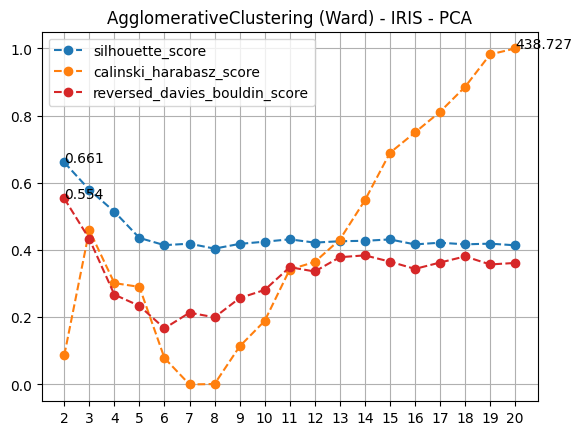

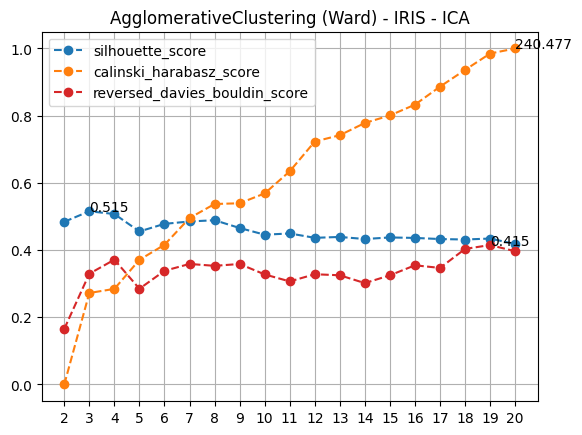

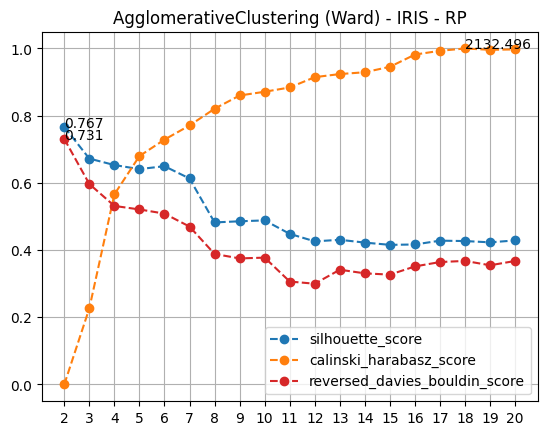

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


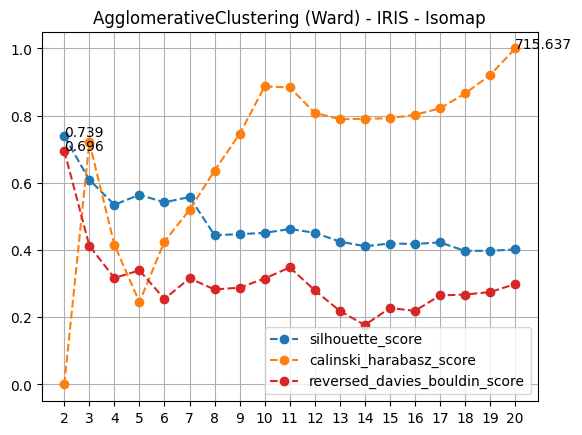

In [9]:
for z in dm_algorithms:
    sil_score = []
    chs_score = []
    dbs_score = []
    if z == "PCA":
        train_data = dm_pca(X_train, 2)
    elif z == "ICA":
        train_data = dm_ica(X_train, 2)
    elif z == "RP":
        train_data = dm_rp(X_train, 2)
    elif z == "Isomap":
        train_data = dm_isomap(X_train, 2, 8)
    else:
        raise ValueError("Not Implemented")
    for c in n_cluster:
        transformer = AgglomerativeClustering(n_clusters=c).fit(train_data)
        y_pred = transformer.labels_
        sil_score.append(silhouette_score(train_data, y_pred))
        chs_score.append(calinski_harabasz_score(train_data, y_pred))
        dbs_score.append(davies_bouldin_score(train_data, y_pred))

    sil_score = sil_score
    chs_score_scaled = scale_data(chs_score)
    dbs_score = dbs_score
    reverse_dbs = [1-x for x in dbs_score]

    colors = mcolors.TABLEAU_COLORS
    plt.plot(n_cluster,sil_score,linestyle='--', marker='o', color=colors["tab:blue"], label="silhouette_score")
    highest = max(sil_score)
    index = sil_score.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))

    plt.plot(n_cluster,chs_score_scaled,linestyle='--', marker='o', color=colors["tab:orange"], label="calinski_harabasz_score")
    highest = max(chs_score_scaled)
    index = chs_score_scaled.index(highest)
    plt.annotate("%.3f" % chs_score[index],(index+2,highest))

    plt.plot(n_cluster,reverse_dbs,linestyle='--', marker='o', color=colors["tab:red"], label="reversed_davies_bouldin_score")
    highest = max(reverse_dbs)
    index = reverse_dbs.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))
    plt.xticks(n_cluster)
    plt.legend()
    plt.grid()
    plt.title("AgglomerativeClustering (Ward) - IRIS - %s" % z)
    plt.show()
    

# Titanic

In [10]:
X_train, X_test, y_train, y_test, supervised_labels = preprocess_titanic(normalized=True)

# GMM

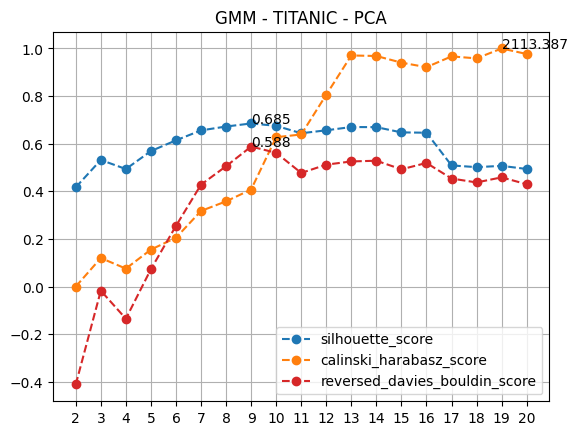

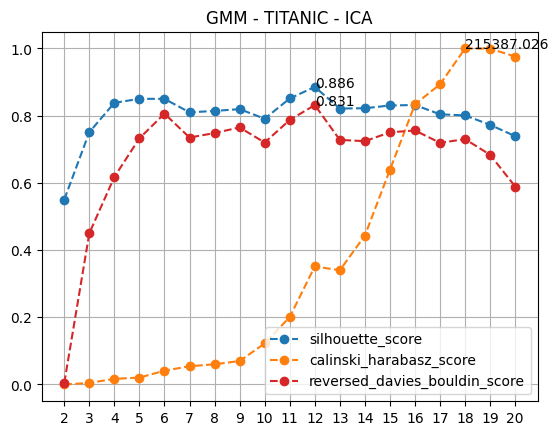

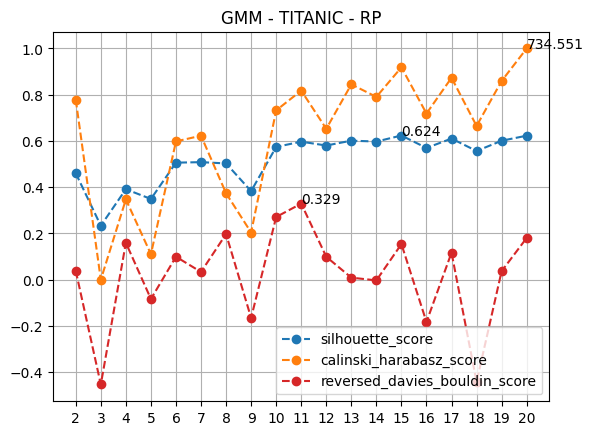

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

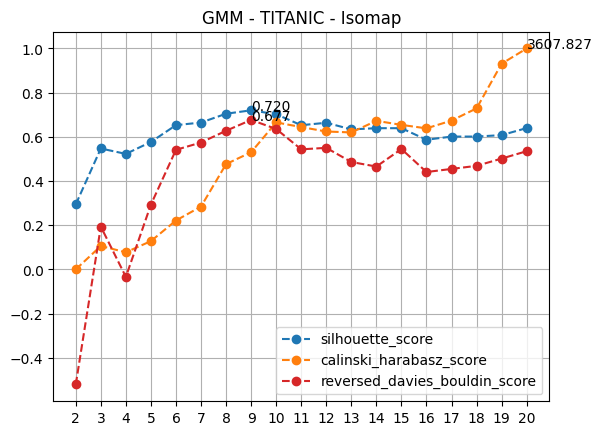

In [11]:
for z in dm_algorithms:
    sil_score = []
    chs_score = []
    dbs_score = []
    if z == "PCA":
        train_data = dm_pca(X_train, 5)
    elif z == "ICA":
        train_data = dm_ica(X_train, 2)
    elif z == "RP":
        train_data = dm_rp(X_train, 3)
    elif z == "Isomap":
        train_data = dm_isomap(X_train, 3, 8)
    else:
        raise ValueError("Not Implemented")
    for c in n_cluster:
        transformer = GaussianMixture(n_components=c, random_state=SEED).fit(train_data)
        y_pred = transformer.predict(train_data)
        sil_score.append(silhouette_score(train_data, y_pred))
        chs_score.append(calinski_harabasz_score(train_data, y_pred))
        dbs_score.append(davies_bouldin_score(train_data, y_pred))

    sil_score = sil_score
    chs_score_scaled = scale_data(chs_score)
    dbs_score = dbs_score
    reverse_dbs = [1-x for x in dbs_score]

    colors = mcolors.TABLEAU_COLORS
    plt.plot(n_cluster,sil_score,linestyle='--', marker='o', color=colors["tab:blue"], label="silhouette_score")
    highest = max(sil_score)
    index = sil_score.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))

    plt.plot(n_cluster,chs_score_scaled,linestyle='--', marker='o', color=colors["tab:orange"], label="calinski_harabasz_score")
    highest = max(chs_score_scaled)
    index = chs_score_scaled.index(highest)
    plt.annotate("%.3f" % chs_score[index],(index+2,highest))

    plt.plot(n_cluster,reverse_dbs,linestyle='--', marker='o', color=colors["tab:red"], label="reversed_davies_bouldin_score")
    highest = max(reverse_dbs)
    index = reverse_dbs.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))
    plt.xticks(n_cluster)
    plt.legend(loc='lower right')
    plt.grid()
    plt.title("GMM - TITANIC - %s" % z)
    plt.show()
    

# AgglomerativeClustering

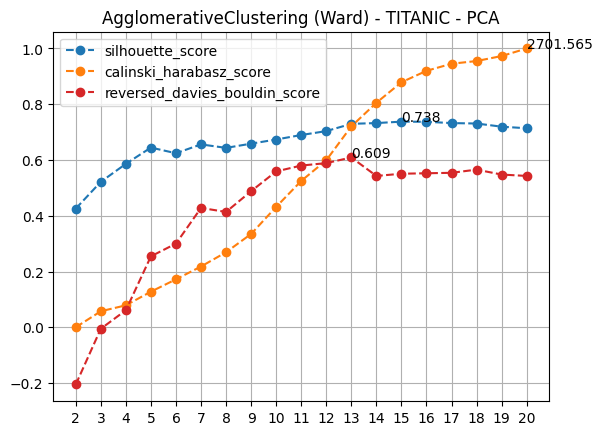

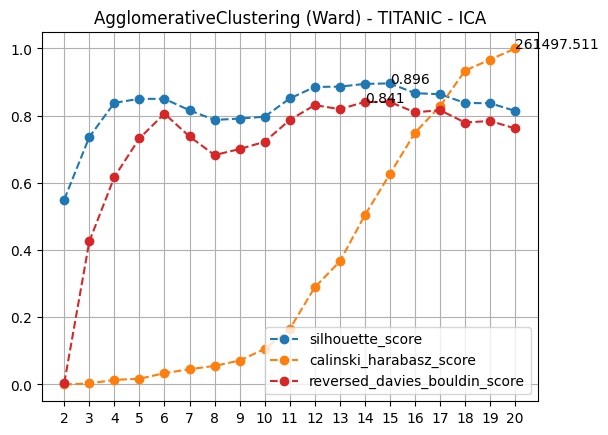

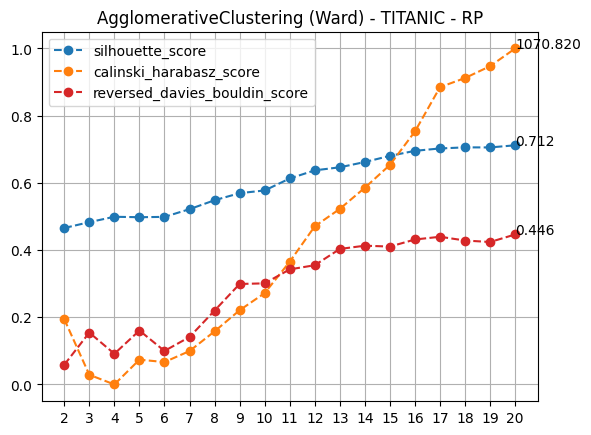

/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/suhendro/miniconda3/envs/mlhw3/lib/python3.12/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

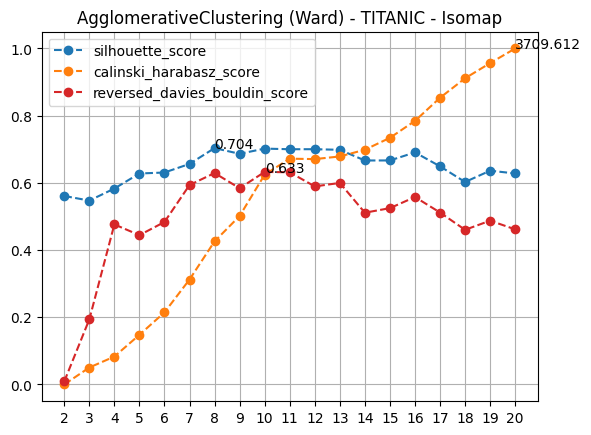

In [12]:
for z in dm_algorithms:
    sil_score = []
    chs_score = []
    dbs_score = []
    if z == "PCA":
        train_data = dm_pca(X_train, 5)
    elif z == "ICA":
        train_data = dm_ica(X_train, 2)
    elif z == "RP":
        train_data = dm_rp(X_train, 3)
    elif z == "Isomap":
        train_data = dm_isomap(X_train, 3, 8)
    else:
        raise ValueError("Not Implemented")
    for c in n_cluster:
        transformer = AgglomerativeClustering(n_clusters=c).fit(train_data)
        y_pred = transformer.labels_
        sil_score.append(silhouette_score(train_data, y_pred))
        chs_score.append(calinski_harabasz_score(train_data, y_pred))
        dbs_score.append(davies_bouldin_score(train_data, y_pred))

    sil_score = sil_score
    chs_score_scaled = scale_data(chs_score)
    dbs_score = dbs_score
    reverse_dbs = [1-x for x in dbs_score]

    colors = mcolors.TABLEAU_COLORS
    plt.plot(n_cluster,sil_score,linestyle='--', marker='o', color=colors["tab:blue"], label="silhouette_score")
    highest = max(sil_score)
    index = sil_score.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))

    plt.plot(n_cluster,chs_score_scaled,linestyle='--', marker='o', color=colors["tab:orange"], label="calinski_harabasz_score")
    highest = max(chs_score_scaled)
    index = chs_score_scaled.index(highest)
    plt.annotate("%.3f" % chs_score[index],(index+2,highest))

    plt.plot(n_cluster,reverse_dbs,linestyle='--', marker='o', color=colors["tab:red"], label="reversed_davies_bouldin_score")
    highest = max(reverse_dbs)
    index = reverse_dbs.index(highest)
    plt.annotate("%.3f" % highest,(index+2,highest))
    plt.xticks(n_cluster)
    plt.legend()
    plt.grid()
    plt.title("AgglomerativeClustering (Ward) - TITANIC - %s" % z)
    plt.show()
    